In [53]:
import numpy as np
import matplotlib.pyplot as plt

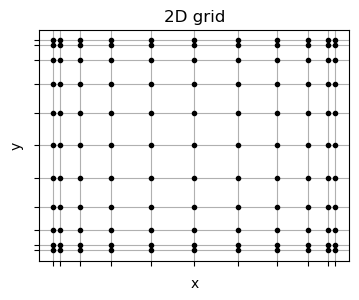

In [54]:
# Tensor product Grid points in x and y directions
N = 10                   # x direction
M = 10                   # y direction

x = np.cos(np.pi * np.linspace(0, N, N+1)/N)
y = np.cos(np.pi * np.linspace(0, M, M+1)/M)

# Create a plot
fig, ax = plt.subplots(figsize=(4, 3))

ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.set_title('2D grid')

# Plot dots at each point on the grid
for i in x:
    for j in y:
        ax.plot(i, j, 'ko', markersize=3)

plt.grid(True)
plt.show()

Chebyshev Differentiation matrix

In [55]:
def Cheb_der(N,y):
    n = len(y)
    D = np.zeros((n,n))
    c = np.ones_like(y)
    c[0] = 2
    c[N] = 2
    for k in range(n):
        for j in range(n):
            if k!=j:
                D[k,j] = (c[k] * (-1)**(k+j))/(c[j] * (y[k]-y[j]))
            else:
                if k==0 and j==0:
                    D[k,j] = (2 * N**2 + 1)/6
                elif k==N and j==N:
                    D[k,j] = -D[0,0]
                else:    
                    D[k,j] = -(y[k])/(2 * (1 - y[k]**2))
    return D

Exercise 1

This exercise has unsteady one-dimensional viscous Burgers' equation with Dirichlet boundary condition and initial conditions as given for each case
$$
u_t + \alpha uu_x = \nu u_{xx}
$$

Initial condition:

$u(x, 0) = f(x),  \;  \;   x\in [a, b]$

Boundary condition

$u(a, t) = f_1(t),  \;  \; u(b, t) = f_2(t), \;\; t\geq 0$

In [56]:
nu = 1
N = 15
T = 1.0
dt = 1e-3

In [57]:
def rhs(N, u, y, t):
    D = Cheb_der(N,y)
    ux = np.dot(D, u)/np.pi
    dd = np.dot(D, D)/np.pi**2
    uxx = np.dot(dd, u)
    uux = np.multiply(u, ux)
    x = (y+1) * np.pi
    spatial = -uux + nu * uxx + (1+np.sin(x + t)) * np.cos(x + t) + nu * np.sin(x + t)
    return spatial

Solve temporal using RK4 method

In [58]:
y = np.cos(np.linspace(0, np.pi, N+1)) 
x = (y+1) * np.pi

u0 = np.sin(x)
u = u0.copy()
u_values = [u.copy()]  # Initial condition
t_values = [0]  
t = 0
while t<T:
    
    u[0] = np.sin(t)
    u[-1] = np.sin(t)
    k1 = dt * rhs(N, u, y, t)
    k2 = dt * rhs(N, u + 0.5 * k1, y, t)
    k3 = dt * rhs(N, u + 0.5 * k2, y, t)
    k4 = dt * rhs(N, u + k3, y, t)
    u += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    t += dt

    u_values.append(u.copy())
    t_values.append(t)

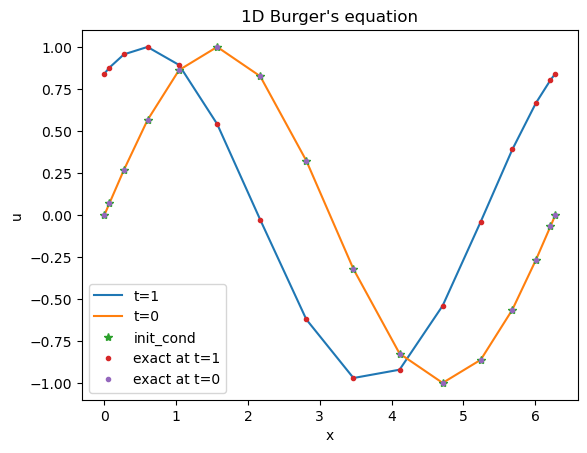

In [59]:
plt.plot(x, np.array(u_values)[-1, :], label='t=1')
plt.plot(x, np.array(u_values)[0], label='t=0')
plt.plot(x, u0, "*", label='init_cond')
plt.plot(x, np.sin(x+1),".", label='exact at t=1')
plt.plot(x, np.sin(x), ".", label='exact at t=0')

plt.xlabel('x')
plt.ylabel('u')
plt.title('1D Burger\'s equation')
plt.legend()
plt.show()

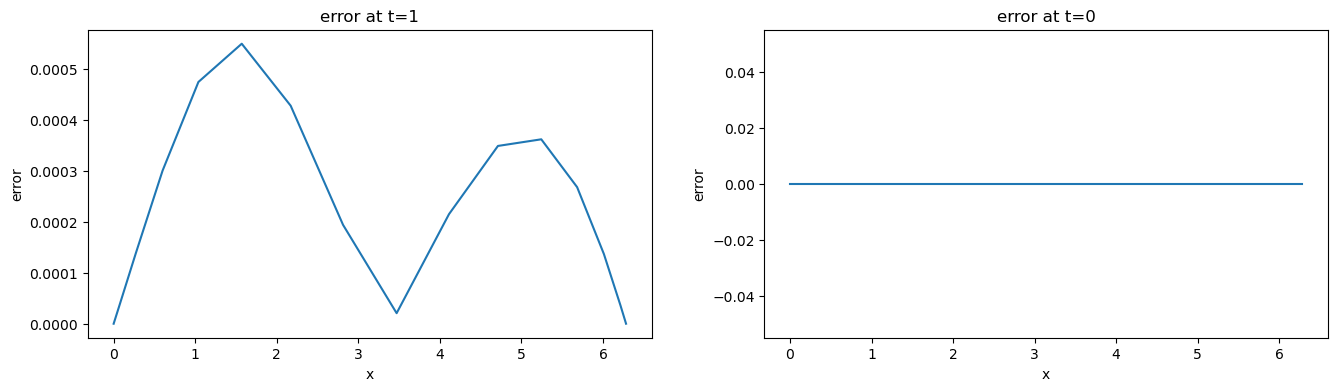

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(x, (np.abs(np.array(u_values)[-1, :]-np.sin(x+1))))
ax1.set_xlabel('x')
ax1.set_ylabel('error')
ax1.set_title('error at t=1')

ax2.plot(x, (np.abs(np.array(u_values)[0, :]-np.sin(x))))
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.set_title('error at t=0')

plt.show()


Exercise 2

In [61]:
def rhs(N, u, y, t):
    D = Cheb_der(N,y)
    ux = np.dot(D, u)/np.pi
    dd = np.dot(D, D)/np.pi**2
    uxx = np.dot(dd, u)
    uux = np.multiply(u, ux)
    x = (y+1) * np.pi
    spatial = -uux + nu * uxx
    return spatial

In [62]:
u0 = 1 - 2*nu*np.tanh(x)
u = u0.copy()
u_values = [u0.copy()]  # Initial condition
t_values = [0]  
t = 0
while t<=T:

    u[-1] = 1 + 2*nu * np.tanh(t)
    u[0] = 1 - 2*nu * np.tanh(2*np.pi -t)
    k1 = dt * rhs(N, u, y, t)
    k2 = dt * rhs(N, u + 0.5 * k1, y, t)
    k3 = dt * rhs(N, u + 0.5 * k2, y, t)
    k4 = dt * rhs(N, u + k3, y, t)
    u += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    t += dt

    u_values.append(u.copy())
    t_values.append(t)

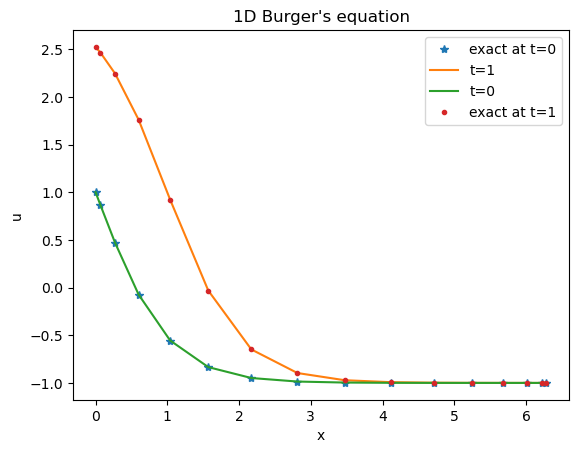

In [63]:

plt.plot(x, 1-2*nu*np.tanh(x), "*",label='exact at t=0')
plt.plot(x, np.array(u_values)[-1], label='t=1')
plt.plot(x, np.array(u_values)[0], label='t=0')
plt.plot(x, 1-2*nu*np.tanh(x-1), ".", label='exact at t=1')

plt.xlabel('x')
plt.ylabel('u')
plt.title('1D Burger\'s equation')
plt.legend()
plt.show()

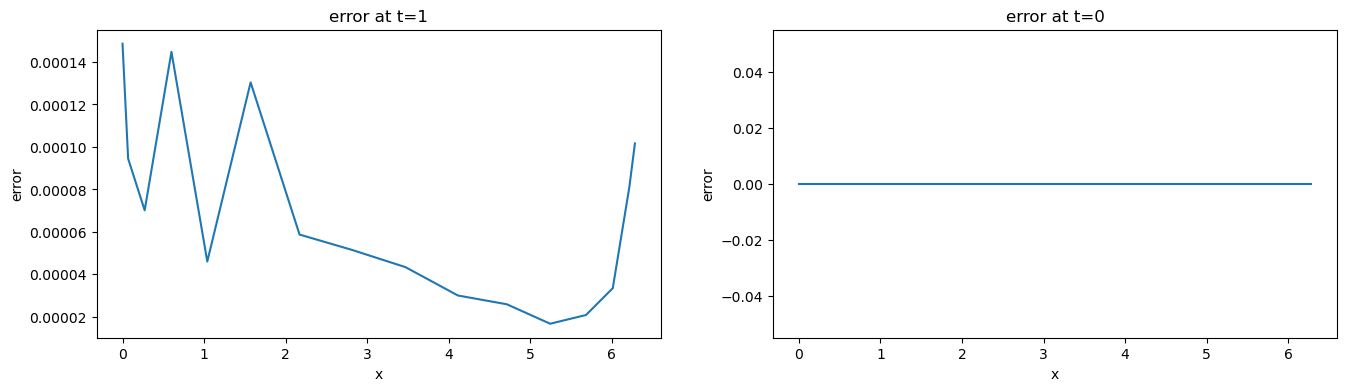

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(x, (np.abs(np.array(u_values)[-1, :]-(1-2*nu*np.tanh(x-1)))))
ax1.set_xlabel('x')
ax1.set_ylabel('error')
ax1.set_title('error at t=1')

ax2.plot(x, (np.abs(np.array(u_values)[0, :]-(1-2*nu*np.tanh(x)))))
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.set_title('error at t=0')

plt.show()

coupled Burger's equations

$$
u_t + \alpha_1 uu_x + \alpha_2 (uv)_x = \nu u_{xx}\\
v_t + \beta_1 vv_x + \beta_2 (uv)_x = \nu v_{xx}\\


$$

In [65]:
def rhs(N, y, w, a1, a2, b1, b2, nu, t):
    u, v = np.split(w, 2)
    D = Cheb_der(N, y)
    ux = np.dot(D, u)/np.pi
    vx = np.dot(D, v)/np.pi
    uxx = np.dot(D@D, u)/np.pi**2
    vxx = np.dot(D@D, v)/np.pi**2
    uux = np.multiply(u, ux)
    vvx = np.multiply(v, vx)
    vux = np.multiply(v, ux)
    uvx = np.multiply(u, vx)
    rhs1 = -a1 * uux - a2 * (vux + uvx) + nu * uxx
    rhs2 = -b1 * vvx - b2 * (vux + uvx) + nu * vxx
    return np.concatenate([rhs1, rhs2])

In [66]:
N = 20
dt = 1e-3
T = 1
y = np.cos(np.linspace(0, np.pi, N+1))
x = y * np.pi
u0 = np.sin(x)
v0 = np.sin(x)

u = u0.copy()
v = v0.copy()
w = np.concatenate([u, v])

nu, a1, b1, a2, b2 = 1, -2, -2, 1, 1

In [67]:
w_values = [w.copy()]  # Initial condition
t_values = [0]  # Initial time

# Time integration
t = 0
i = 0
while t < T:
    w[0], w[-1], w[len(u)-1], w[len(u)] = 0, 0, 0, 0
    k1 = rhs(N, y, w, a1, a2, b1, b2, nu, t)
    k2 = rhs(N, y, w + dt/2 * k1, a1, a2, b1, b2, nu, t + dt/2)
    k3 = rhs(N, y, w + dt/2 * k2, a1, a2, b1, b2, nu, t + dt/2)
    k4 = rhs(N, y, w + dt * k3, a1, a2, b1, b2, nu, t + dt)
    w += dt/6 * (k1 + 2 * k2 + 2 * k3 + k4)
    t += dt
    
    # Check for nan values in u
    if np.isnan(w).any():
        print(f"Solution became nan at time t = {t}")
        break
    
    # Append u value and t value to lists
    w_values.append(w.copy())
    t_values.append(t)

# Convert lists to arrays for plotting
w_values = np.array(w_values)
t_values = np.array(t_values)

# print(t_values)
# print(w_values[-1,:]-np.concatenate([np.exp(-1)*np.sin(x),np.exp(-1)*np.sin(x)]))


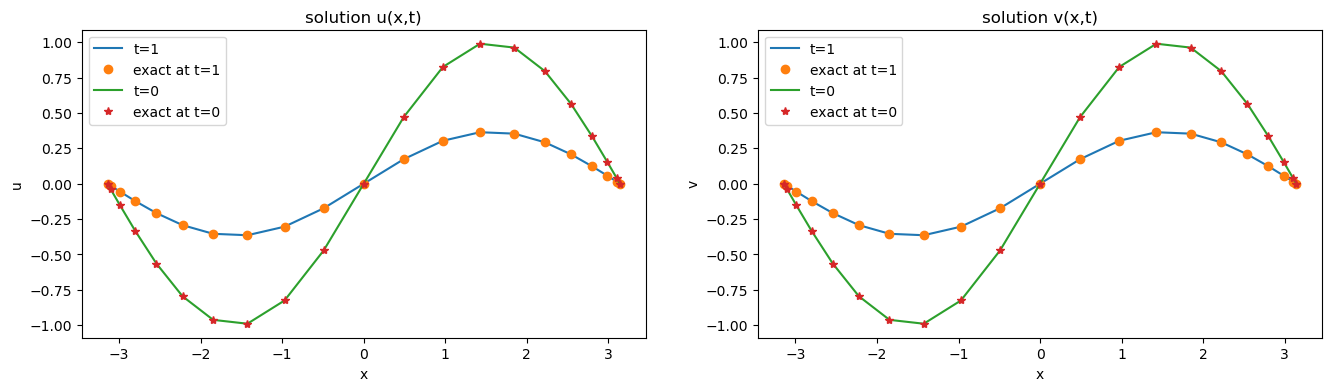

In [68]:
u1, v1 = np.split(w_values[-1], 2)
u0, v0 = np.split(w_values[0], 2)
ut, vt = np.split(w_values[100], 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(x, u1, label='t=1')
ax1.plot(x, np.exp(-1)*np.sin(x), "o", label='exact at t=1')
ax1.plot(x, u0, label='t=0')
ax1.plot(x, np.exp(0)*np.sin(x), "*", label='exact at t=0')
ax1.set_xlabel('x')
ax1.set_ylabel('u')
ax1.set_title('solution u(x,t)')
ax1.legend()

ax2.plot(x, v1, label='t=1')
ax2.plot(x, np.exp(-1)*np.sin(x),"o", label='exact at t=1')
ax2.plot(x, v0, label='t=0')
ax2.plot(x, np.exp(0)*np.sin(x),"*", label='exact at t=0')
ax2.set_xlabel('x')
ax2.set_ylabel('v')
ax2.set_title('solution v(x,t)')
ax2.legend()

plt.show()

In [69]:
# # Define parameters
# alpha1 = -2
# alpha2 = 1
# beta1 = -2
# beta2 = 1
# nu = 1  # viscosity
# L = 2 * np.pi  # domain length
# T = 1  # total time
# Nx = 26  # number of spatial grid points
# Nt = 10000  # number of time steps

# # Define spatial grid
# x = np.linspace(-np.pi, np.pi, Nx)
# dx = x[1] - x[0]

# # Define initial conditions
# u0 = np.sin(x)
# v0 = np.sin(x)

# # Initialize solution arrays
# u = u0.copy()
# v = v0.copy()

# # Define functions for spatial derivatives
# def u_xx(u):
#     return np.gradient(np.gradient(u, dx), dx)

# def v_xx(v):
#     return np.gradient(np.gradient(v, dx), dx)

# # Time integration using explicit Euler method
# dt = T / Nt
# for t in range(Nt):
#     # Compute spatial derivatives
#     u_x = np.gradient(u, dx)
#     v_x = np.gradient(v, dx)
#     uv_x = u * v_x + v * u_x
    
#     # Compute temporal derivatives
#     u_t = -alpha1 * u * u_x - alpha2 * uv_x + nu * u_xx(u)
#     v_t = -beta1 * v * v_x - beta2 * uv_x + nu * v_xx(v)
    
#     u[0] = 0
#     u[-1] = 0
#     v[0] = 0
#     v[-1] = 0
    
#     # Update solutions using explicit Euler method
#     u += dt * u_t
#     v += dt * v_t
# # Compute exact solution at t = 1
# exact_u = np.exp(-1) * np.sin(x)
# exact_v = np.exp(-1) * np.sin(x)

# # Calculate error
# error_u = (exact_u-u)
# error_v = np.abs(v - exact_v)

# # Plot results
# plt.figure(figsize=(8, 10))

# plt.subplot(2, 1, 1)
# plt.plot(x, u, label='FDM')
# plt.plot(x1, u1, label='CCM')
# plt.plot(x, np.exp(-1) * np.sin(x), "o", label='exact')
# # plt.plot(x, exact_u, label='Exact solution (u)')
# plt.xlabel('x')
# plt.ylabel('Solution (u)')
# plt.title('N = 25, Solution of u at t = 1')
# plt.legend()
# # plt.grid(True)

# plt.subplot(2, 1, 2)
# plt.plot(x, error_u, label='Error (u)',linestyle='-', marker='o')
# plt.xlabel('x')
# plt.ylabel('Error (u)')
# plt.title('Error of u at t = 1')
# plt.legend()
# # plt.grid(True)

# plt.tight_layout()
# plt.show()

In [70]:
# exact_u = np.exp(-1) * np.sin(x)
# exact_v = np.exp(-1) * np.cos(x)

# # Calculate error
# error_u = np.abs(u - exact_u)
# error_v = np.abs(v - exact_v)


GIF for time 

In [71]:
# import imageio

# # Create a list to store file names
# file_names = []
# to keep the axis limit same through the GIF
# y_min = -1.2
# y_max = 1.2

# # for all time steps
# for idx, t in enumerate(t_values):
#     plt.figure()
#     u1, v1 = np.split(w_values[idx], 2)
#     plt.plot(x, u1)
#     plt.plot(x, np.exp(-t) * np.sin(x), "o")
#     plt.xlabel('x')
#     plt.ylabel('u(x)')
#     plt.title(f'N ={N}, at time t = {t}')
#     plt.ylim(y_min, y_max)
#     # Save the plot as an image
#     file_name = f'plot_{idx}.png'
#     plt.savefig(file_name)
#     file_names.append(file_name)
#     plt.close()

# images = []
# for file_name in file_names:
#     images.append(imageio.imread(file_name))

# imageio.mimsave('output1.gif', images)

    

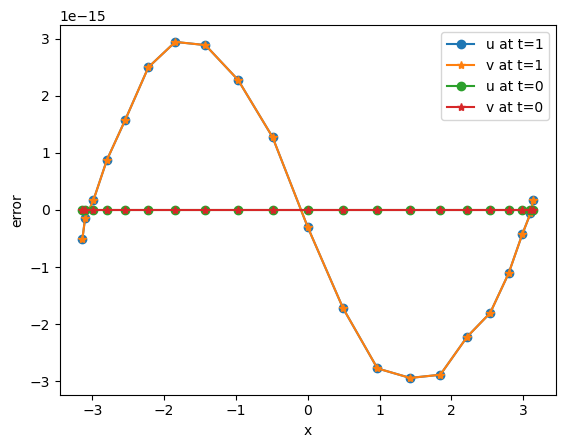

In [72]:
plt.plot(x, (np.exp(-1) * np.sin(x) - u1),linestyle='-', marker='o', label='u at t=1')
plt.plot(x, (np.exp(-1) * np.sin(x) - v1),linestyle='-', marker='*',label='v at t=1')
plt.plot(x, (np.exp(0) * np.sin(x) - u0),linestyle='-', marker='o', label='u at t=0')
plt.plot(x, (np.exp(0) * np.sin(x) - v0),linestyle='-', marker='*', label='v at t=0')
plt.xlabel('x')
plt.ylabel('error')
plt.legend()
plt.show()

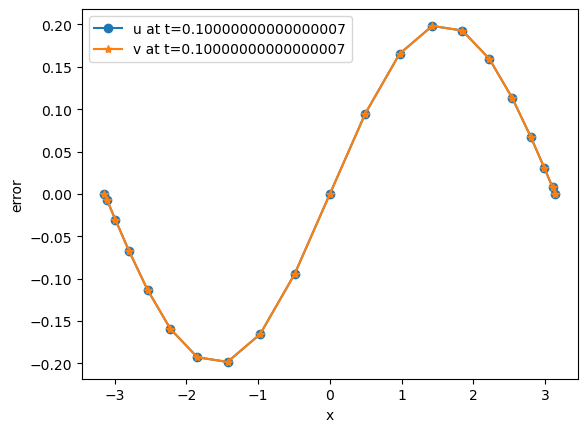

In [73]:
plt.plot(x, (np.exp(t_values[100]) * np.sin(x) - ut),linestyle='-', marker='o', label=f'u at t={t_values[100]}')
plt.plot(x, (np.exp(t_values[100]) * np.sin(x) - vt),linestyle='-', marker='*', label=f'v at t={t_values[100]}')
plt.xlabel('x')
plt.ylabel('error')
plt.legend()
plt.show()

2D viscous Burger's 
$$
u_t + \alpha uu_x + \beta uu_y = \nu (u_{xx} + u_{yy})
$$


two dimensional non-linear coupled viscous Burger's equations

$$
u_t + \alpha_1 uu_x + \alpha_2 vu_y = \nu (u_{xx} + u_{yy})\\
v_t + \beta_1 uv_x + \beta_2 vv_y = \nu (v_{xx} + v_{yy})
$$

In [74]:
def rhs(N, M, x, y, u, a, b, nu, t):
    dx =  Cheb_der(N, x)
    dy =  Cheb_der(M, y)
    Dx = np.kron(np.eye(len(y)), dx*2)
    Dy = np.kron(dy*2, np.eye(len(x)))
    Dxx = np.kron(np.eye(len(y)), np.dot(dx, dx)*4)
    Dyy = np.kron(np.dot(dy, dy)*4, np.eye(len(x)))
    ux = np.dot(Dx, u)
    uy = np.dot(Dy, u)
    uux = (u*ux)
    uuy = (u*uy)
    uxx = np.dot(Dxx, u)
    uyy = np.dot(Dyy, u)

    spatial = -a*uux - b*uuy + nu*(uxx+uyy)
    spatial = np.array(spatial) + 0*t
    return spatial

nu = 1
a = 1
b = 1
N = 10
M = 10
dt = 1e-2
T = 1

x0 = np.cos(np.linspace(0, np.pi, N+1))*0.5 + 0.5
y0 = np.cos(np.linspace(0, np.pi, N+1))*0.5 + 0.5

x = np.cos(np.linspace(0, np.pi, N+1))*0.5 + 0.5
y = np.cos(np.linspace(0, np.pi, M+1))*0.5 + 0.5
x, y = np.meshgrid(x, y)
u0 =  (1/(1+np.exp(((x+1)/2+(y+1)/2)/(2*nu)))).flatten()
u = u0.copy()

In [75]:
u_values = [u.copy()]  # Initial condition
t_values = [0]  # Initial time

# Time integration
t = 0
i = 0
while t < T:
    # boundary condition
    u[:N+1] = 1/(1+np.exp((x0+1-t)/(2*nu)))                  # y bc 
    u[M*(N+1):] = 1/(1+np.exp((x0-t)/(2*nu)))              # y bc
    u[::N+1] = 1/(1+np.exp((1+x0-t)/(2*nu)))                # x bc
    u[N::N+1] = 1/(1+np.exp((x0-t)/(2*nu)))
    k1 = rhs(N, M, x0, y0, u, a, b, nu, t)
    k2 = rhs(N, M, x0, y0, u + dt/2 * k1, a, b, nu, t + dt/2)
    k3 = rhs(N, M, x0, y0, u + dt/2 * k2, a, b, nu, t + dt/2)
    k4 = rhs(N, M, x0, y0, u + dt * k3, a, b, nu, t + dt)
    u += dt/6 * (k1 + 2 * k2 + 2 * k3 + k4)
    t += dt

    if np.isnan(u).any():
        print(f"Solution became nan at time t = {t}")
        break
    
    # Append u value and t value to lists
    u_values.append(u.copy())
    t_values.append(t)

# Convert lists to arrays for plotting
u_values = np.array(u_values)
t_values = np.array(t_values)

Solution became nan at time t = 0.03


/tmp/ipykernel_170559/2133222181.py:10: RuntimeWarning: overflow encountered in multiply
  uux = (u*ux)
/tmp/ipykernel_170559/2133222181.py:11: RuntimeWarning: overflow encountered in multiply
  uuy = (u*uy)
/tmp/ipykernel_170559/2133222181.py:15: RuntimeWarning: invalid value encountered in subtract
  spatial = -a*uux - b*uuy + nu*(uxx+uyy)


In [76]:
u0 = u_values[0].reshape(M+1, N+1)
u1 = u_values[-1].reshape(M+1, N+1)
# u300 = u_values[300].reshape(M+1, N+1)

Text(0.5, 1.0, 'u at t=1')

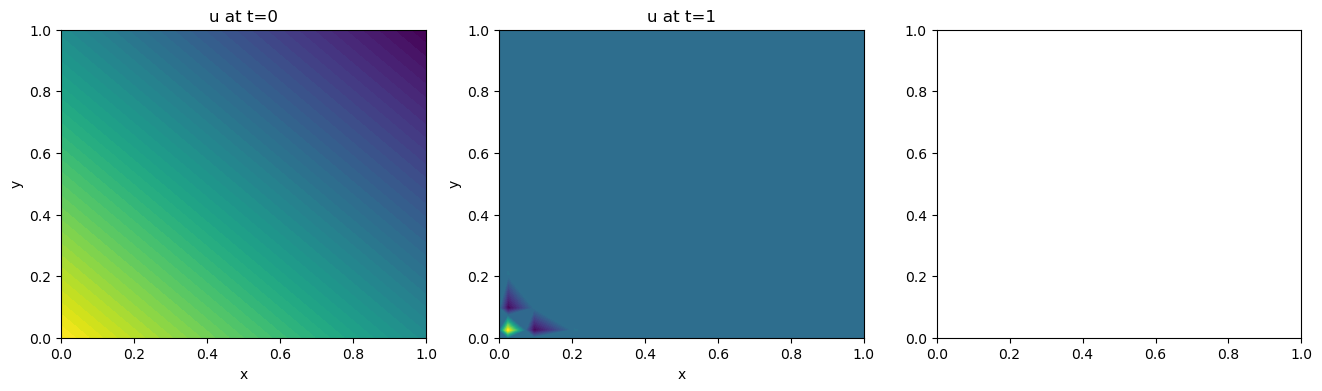

In [77]:
levels0 = np.linspace(u0.min(), u0.max())
levels1 = np.linspace(u1.min(), u1.max())
# levels300 = np.linspace(u300.min(), u300.max())


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
ax1.contourf(x, y, u0, levels=levels0)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('u at t=0')

ax2.contourf(x, y, u1, levels=levels1)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('u at t=1')

# ax3.contourf(x, y, u300, levels=levels300)
# ax3.set_xlabel('x')
# ax3.set_ylabel('y')
# ax3.set_title(f'u at t={t_values[300]}')

Can't figure out why the above code after third iteration giving nan solution. Plus iterationbroke so the plot at t=1 is not correct.